In [2]:
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings("ignore")
import glob

tlc_data = []

tlc_data.append(pd.read_parquet("../data/raw/yellow/yellow_tripdata_2021-01.parquet", engine='pyarrow'))
tlc_data.append(pd.read_parquet("../data/raw/yellow/yellow_tripdata_2021-03.parquet", engine='pyarrow'))
tlc_data.append(pd.read_parquet("../data/raw/yellow/yellow_tripdata_2021-05.parquet", engine='pyarrow'))
tlc_data.append(pd.read_parquet("../data/raw/yellow/yellow_tripdata_2021-08.parquet", engine='pyarrow'))
tlc_data.append(pd.read_parquet("../data/raw/yellow/yellow_tripdata_2021-10.parquet", engine='pyarrow'))
tlc_data.append(pd.read_parquet("../data/raw/yellow/yellow_tripdata_2021-12.parquet", engine='pyarrow'))

# New York City TLC dataset pre-processing

In [3]:
# Creat a DataFrame
yellow = pd.concat(tlc_data, ignore_index=True)
# define the columns need to be droped
needToDrop = ['VendorID','store_and_fwd_flag']
#drop the useless columns
cleaned_data = yellow.drop(columns = needToDrop)


In [4]:
cleaned_data

,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,airport_fee
0,2021-01-01 00:30:10,2021-01-01 00:36:12,1.0,2.10,1.0,142,43,2,8.00,3.0,0.5,0.00,0.0,0.3,11.80,2.5,NaN
1,2021-01-01 00:51:20,2021-01-01 00:52:19,1.0,0.20,1.0,238,151,2,3.00,0.5,0.5,0.00,0.0,0.3,4.30,0.0,NaN
2,2021-01-01 00:43:30,2021-01-01 01:11:06,1.0,14.70,1.0,132,165,1,42.00,0.5,0.5,8.65,0.0,0.3,51.95,0.0,NaN
3,2021-01-01 00:15:48,2021-01-01 00:31:01,0.0,10.60,1.0,138,132,1,29.00,0.5,0.5,6.05,0.0,0.3,36.35,0.0,NaN
4,2021-01-01 00:31:49,2021-01-01 00:48:21,1.0,4.94,1.0,68,33,1,16.50,0.5,0.5,4.06,0.0,0.3,24.36,2.5,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15268655,2021-12-31 23:18:02,2021-12-31 23:32:19,NaN,3.99,NaN,145,107,0,17.42,0.0,0.5,5.80,0.0,0.3,26.52,NaN,NaN
15268656,2021-12-31 23:46:00,2022-01-01 00:07:00,NaN,5.96,NaN,236,158,0,23.05,0.0,0.5,2.85,0.0,0.3,29.20,NaN,NaN
15268657,2021-12-31 23:46:00,2022-01-01 00:04:00,NaN,4.99,NaN,48,13,0,20.97,0.0,0.5,5.23,0.0,0.3,29.50,NaN,NaN
15268658,2021-12-31 23:53:00,2022-01-01 00:02:00,NaN,1.36,NaN,75,75,0,13.20,0.0,0.5,2.00,0.0,0.3,16.00,NaN,NaN


In [5]:
#create a column to show only the date
cleaned_data['DATE'] = pd.to_datetime(cleaned_data['tpep_pickup_datetime']).dt.date
cleaned_data["DATE"] = (cleaned_data["DATE"]).apply(str)

In [6]:
#make sure all the data is in the four months selected  in 2019
start_date = "2021-01-01"
end_date = "2021-01-31"
after_start_date = cleaned_data["DATE"] >= start_date
before_end_date = cleaned_data["DATE"] <= end_date
between_two_dates = after_start_date & before_end_date
January = cleaned_data.loc[between_two_dates]

start_date = "2021-03-01"
end_date = "2021-03-30"
after_start_date = cleaned_data["DATE"] >= start_date
before_end_date = cleaned_data["DATE"] <= end_date
between_two_dates = after_start_date & before_end_date
March= cleaned_data.loc[between_two_dates]

start_date = "2021-05-01"
end_date = "2021-05-31"
after_start_date = cleaned_data["DATE"] >= start_date
before_end_date = cleaned_data["DATE"] <= end_date
between_two_dates = after_start_date & before_end_date
May= cleaned_data.loc[between_two_dates]

start_date = "2021-08-01"
end_date = "2021-08-31"
after_start_date = cleaned_data["DATE"] >= start_date
before_end_date = cleaned_data["DATE"] <= end_date
between_two_dates = after_start_date & before_end_date
August= cleaned_data.loc[between_two_dates]

start_date = "2021-10-01"
end_date = "2021-10-31"
after_start_date = cleaned_data["DATE"] >= start_date
before_end_date = cleaned_data["DATE"] <= end_date
between_two_dates = after_start_date & before_end_date
October= cleaned_data.loc[between_two_dates]

start_date = "2021-12-01"
end_date = "2021-12-31"
after_start_date = cleaned_data["DATE"] >= start_date
before_end_date = cleaned_data["DATE"] <= end_date
between_two_dates = after_start_date & before_end_date
December= cleaned_data.loc[between_two_dates]

cleaned_data = pd.concat([January,March,May,August,October,December], axis=0)
#after all remove the useless column DATE
cleaned_data = cleaned_data.drop(columns = "DATE")

In [60]:
cleaned_data

,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,airport_fee
0,2021-01-01 00:30:10,2021-01-01 00:36:12,1.0,2.10,1.0,142,43,2,8.00,3.0,0.5,0.00,0.0,0.3,11.80,2.5,NaN
1,2021-01-01 00:51:20,2021-01-01 00:52:19,1.0,0.20,1.0,238,151,2,3.00,0.5,0.5,0.00,0.0,0.3,4.30,0.0,NaN
2,2021-01-01 00:43:30,2021-01-01 01:11:06,1.0,14.70,1.0,132,165,1,42.00,0.5,0.5,8.65,0.0,0.3,51.95,0.0,NaN
3,2021-01-01 00:15:48,2021-01-01 00:31:01,0.0,10.60,1.0,138,132,1,29.00,0.5,0.5,6.05,0.0,0.3,36.35,0.0,NaN
4,2021-01-01 00:31:49,2021-01-01 00:48:21,1.0,4.94,1.0,68,33,1,16.50,0.5,0.5,4.06,0.0,0.3,24.36,2.5,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15268655,2021-12-31 23:18:02,2021-12-31 23:32:19,NaN,3.99,NaN,145,107,0,17.42,0.0,0.5,5.80,0.0,0.3,26.52,NaN,NaN
15268656,2021-12-31 23:46:00,2022-01-01 00:07:00,NaN,5.96,NaN,236,158,0,23.05,0.0,0.5,2.85,0.0,0.3,29.20,NaN,NaN
15268657,2021-12-31 23:46:00,2022-01-01 00:04:00,NaN,4.99,NaN,48,13,0,20.97,0.0,0.5,5.23,0.0,0.3,29.50,NaN,NaN
15268658,2021-12-31 23:53:00,2022-01-01 00:02:00,NaN,1.36,NaN,75,75,0,13.20,0.0,0.5,2.00,0.0,0.3,16.00,NaN,NaN


In [61]:
#convert the pickup and dropoff date and time to  datetime64[ns]
cleaned_data["tpep_dropoff_datetime"] = pd.to_datetime(cleaned_data["tpep_dropoff_datetime"])
cleaned_data["tpep_pickup_datetime"] = pd.to_datetime(cleaned_data["tpep_pickup_datetime"])
#add columns time_used and avg_speed
cleaned_data["time_used"] = (cleaned_data["tpep_dropoff_datetime"]-cleaned_data["tpep_pickup_datetime"]).dt.seconds/60
cleaned_data["avg_speed"] = cleaned_data["trip_distance"]/cleaned_data["time_used"]*60

In [62]:
# remove implausible values
## Keep at least one passenger and no more than five
cleaned_data = cleaned_data[(cleaned_data['passenger_count']>0)&(cleaned_data["passenger_count"]<=5)]

##make sure the distance of trip is at least 0.1mile
cleaned_data = cleaned_data[cleaned_data["trip_distance"]>=0.1]

# only use the payment is 1.credit card \2.Cash\5.unknown
cleaned_data = cleaned_data[(cleaned_data["payment_type"]!=3)&(cleaned_data["payment_type"]!=4)&(cleaned_data["payment_type"]!=6)]

#Make sure the fare_amount larger than entry fee 2.5
cleaned_data = cleaned_data[(cleaned_data["fare_amount"]>=2.5)]

#Make sure the total_amount larger than entry fee 2.5
cleaned_data = cleaned_data[(cleaned_data["total_amount"]>=2.5)]

#there only 0 or 0.5 or 1 for extra
cleaned_data = cleaned_data[(cleaned_data["extra"]== 0 )|(cleaned_data["extra"]== 0.5 )|(cleaned_data["extra"]== 1)]

## Make sure all the trip is happened within2021
cleaned_data = cleaned_data[(cleaned_data["tpep_pickup_datetime"]<="2021-12-31 23:59:59") & (cleaned_data["tpep_dropoff_datetime"]<="2021-12-31 23:59:59")]
cleaned_data = cleaned_data[(cleaned_data["tpep_pickup_datetime"]>="2021-01-01 00:00:00") & (cleaned_data["tpep_dropoff_datetime"]>="2021-01-01 00:00:00")]

#make sure the average speed is lower than 100 and larger than 1
cleaned_data = cleaned_data[(cleaned_data["avg_speed"]<=100) & (cleaned_data["avg_speed"]>=1)]

#make sure the time used is more than 2 minute and less than  3 hours
cleaned_data = cleaned_data[(cleaned_data["time_used"]>=2)& (cleaned_data["time_used"]<180)]

In [63]:
#remove useless columns and add useful columns
#add the congetion surcharge to the total amount and form the column final amount
cleaned_data["final_amount"] = cleaned_data["total_amount"]+cleaned_data["congestion_surcharge"]

#remove the usless columns
remove = ["payment_type","extra","mta_tax","improvement_surcharge","tolls_amount","congestion_surcharge"]
cleaned_data = cleaned_data.drop(columns=remove)

#change the type of datetime data back to string
cleaned_data["tpep_dropoff_datetime"] = (cleaned_data["tpep_dropoff_datetime"]).apply(str)
cleaned_data["tpep_pickup_datetime"] = (cleaned_data["tpep_pickup_datetime"]).apply(str)
cleaned_data['DATE'] = pd.to_datetime(cleaned_data['tpep_pickup_datetime']).dt.date

In [64]:
cleaned_data

,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,PULocationID,DOLocationID,fare_amount,tip_amount,total_amount,airport_fee,time_used,avg_speed,final_amount,DATE
2,2021-01-01 00:43:30,2021-01-01 01:11:06,1.0,14.70,1.0,132,165,42.0,8.65,51.95,NaN,27.600000,31.956522,51.95,2021-01-01
4,2021-01-01 00:31:49,2021-01-01 00:48:21,1.0,4.94,1.0,68,33,16.5,4.06,24.36,NaN,16.533333,17.927419,26.86,2021-01-01
6,2021-01-01 00:00:28,2021-01-01 00:17:28,1.0,4.10,1.0,95,157,16.0,0.00,17.30,NaN,17.000000,14.470588,17.30,2021-01-01
10,2021-01-01 00:15:52,2021-01-01 00:38:07,3.0,6.11,1.0,164,255,20.5,0.00,24.30,NaN,22.250000,16.476404,26.80,2021-01-01
11,2021-01-01 00:46:36,2021-01-01 00:53:45,2.0,1.21,1.0,255,80,7.0,2.49,10.79,NaN,7.150000,10.153846,10.79,2021-01-01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15166280,2021-12-31 23:48:25,2021-12-31 23:57:56,1.0,2.14,1.0,236,239,9.5,0.00,13.30,0.0,9.516667,13.492119,15.80,2021-12-31
15166283,2021-12-31 23:11:13,2021-12-31 23:13:49,2.0,0.61,1.0,113,234,4.0,1.56,9.36,0.0,2.600000,14.076923,11.86,2021-12-31
15166284,2021-12-31 23:27:31,2021-12-31 23:32:32,2.0,0.95,1.0,164,137,5.5,1.70,11.00,0.0,5.016667,11.362126,13.50,2021-12-31
15166286,2021-12-31 23:07:23,2021-12-31 23:12:45,2.0,1.05,1.0,237,229,6.0,2.45,12.25,0.0,5.366667,11.739130,14.75,2021-12-31


In [65]:
#save the data before removing the outliers
cleaned_data.reset_index().to_feather("../data/curated/cleaned_yellow_21.feather")

In [66]:
# boxplot before IQR 
amount=["fare_amount","tip_amount","final_amount"]

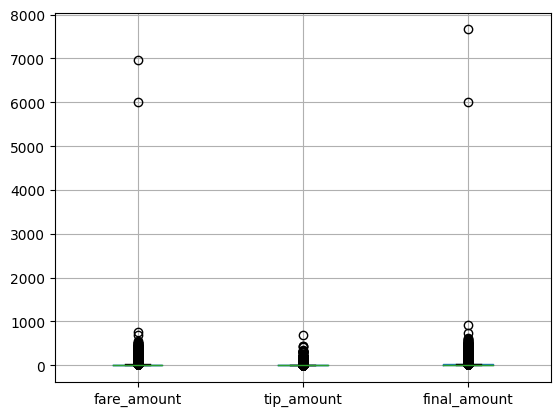

In [69]:
amount_boxplot = cleaned_data.boxplot(column = amount)

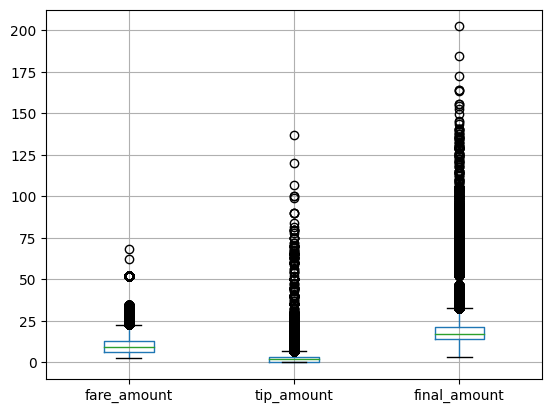

In [82]:
# boxplot after IQR 
#seperate the location around airport
jfk_data = cleaned_data[(cleaned_data["RatecodeID"]==2)]
standard_data = cleaned_data[(cleaned_data["RatecodeID"]==1)]
#apply data cleaning to the jfk data
jfk_data = jfk_data[jfk_data["fare_amount"]>=52]
jfk_data = jfk_data[jfk_data["final_amount"]>52]
jfk_data = jfk_data[jfk_data["tip_amount"]<150]
#define Q1 Q3 and IQR
JFK_Q1 = jfk_data.quantile(0.25)
JFK_Q3 = jfk_data.quantile(0.75)
JFK_IQR = JFK_Q3-JFK_Q1

standard_Q1 = standard_data.quantile(0.25)
standard_Q3 = standard_data.quantile(0.75)
standard_IQR = standard_Q3-standard_Q1

#remove the outliers in jfk
JFK =jfk_data[~((jfk_data<(JFK_Q1-3*JFK_IQR))|(jfk_data > (JFK_Q3+3*JFK_IQR))).any(axis=1)]

#remove the outliers in standard
standard =standard_data[~((standard_data<(standard_Q1-3*standard_IQR))|(standard_data > (standard_Q3+3*standard_IQR))).any(axis=1)]
#combine the data together
final = standard.append(jfk_data, ignore_index=True)
amount_boxplot = final.boxplot(column = amount)

In [81]:
final

,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,PULocationID,DOLocationID,fare_amount,tip_amount,total_amount,airport_fee,time_used,avg_speed,final_amount,DATE
0,2021-01-01 00:31:49,2021-01-01 00:48:21,1.0,4.94,1.0,68,33,16.5,4.06,24.36,NaN,16.533333,17.927419,26.86,2021-01-01
1,2021-01-01 00:00:28,2021-01-01 00:17:28,1.0,4.10,1.0,95,157,16.0,0.00,17.30,NaN,17.000000,14.470588,17.30,2021-01-01
2,2021-01-01 00:17:48,2021-01-01 00:21:55,1.0,1.01,1.0,236,237,5.5,1.00,10.30,NaN,4.116667,14.720648,12.80,2021-01-01
3,2021-01-01 00:33:38,2021-01-01 00:38:37,1.0,0.73,1.0,142,239,5.5,2.79,12.09,NaN,4.983333,8.789298,14.59,2021-01-01
4,2021-01-01 00:47:56,2021-01-01 00:52:53,1.0,1.17,1.0,238,166,6.5,2.06,12.36,NaN,4.950000,14.181818,14.86,2021-01-01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6960503,2021-12-31 23:15:34,2021-12-31 23:43:17,1.0,19.10,2.0,132,166,52.0,15.15,75.75,1.25,27.716667,41.346963,75.75,2021-12-31
6960504,2021-12-31 23:39:22,2021-12-31 23:57:47,1.0,16.57,2.0,132,194,52.0,0.00,60.60,1.25,18.416667,53.983710,60.60,2021-12-31
6960505,2021-12-31 23:16:50,2021-12-31 23:50:48,1.0,27.14,2.0,132,106,52.0,13.51,67.56,1.25,33.966667,47.941119,67.56,2021-12-31
6960506,2021-12-31 23:29:26,2021-12-31 23:39:36,1.0,8.16,2.0,226,131,52.0,0.00,52.80,0.00,10.166667,48.157377,52.80,2021-12-31


In [77]:
#save the data after the removing of outliers
final.reset_index().to_feather("../data/curated/cleaned_yellow_21_5IQR.feather")

# Weather Data Processing

In [71]:
# Weather Data Processing
df = pd.read_csv("../data/raw/weather_2021.csv")
to_drop = ["WSF2","WSF5","WDF2","WT06","WT08","WDF5","PGTM","WT02","TSUN","TAVG","WT01","WT04"]
useful = df.drop(columns = to_drop)

In [83]:
useful

,DATE,AWND,PRCP,SNOW,SNWD,TMAX,TMIN,WT03
0,2021-01-01,0.00,0.06,0.0,0.0,58,39,0.0
1,2021-02-01,0.00,0.00,0.0,0.0,40,35,0.0
2,2021-03-01,0.00,0.00,0.0,0.0,44,37,0.0
3,2021-04-01,0.00,0.00,0.0,0.0,47,35,0.0
4,2021-05-01,0.00,0.50,0.0,0.0,47,41,0.0
...,...,...,...,...,...,...,...,...
360,2021-12-27,4.47,0.00,0.0,0.0,54,46,0.0
361,2021-12-28,4.03,0.00,0.0,0.0,51,43,0.0
362,2021-12-29,4.92,0.25,0.0,0.0,44,39,0.0
363,2021-12-30,12.75,0.74,0.0,0.0,41,37,0.0


In [84]:
#convert the type of date
useful["DATE"] = pd.to_datetime(useful["DATE"])

#fill the missing data with 0
useful = useful.fillna(0)

#select the data in 6 months needed

start_date = "2021-01-01"
end_date = "2021-01-31"
after_start_date = useful["DATE"] >= start_date
before_end_date = useful["DATE"] <= end_date
between_two_dates = after_start_date & before_end_date
January = useful.loc[between_two_dates]

start_date = "2021-03-01"
end_date = "2021-03-31"
after_start_date = useful["DATE"] >= start_date
before_end_date = useful["DATE"] <= end_date
between_two_dates = after_start_date & before_end_date
March= useful.loc[between_two_dates]

start_date = "2021-05-01"
end_date = "2021-05-31"
after_start_date = useful["DATE"] >= start_date
before_end_date = useful["DATE"] <= end_date
between_two_dates = after_start_date & before_end_date
May= useful.loc[between_two_dates]

start_date = "2021-08-01"
end_date = "2021-08-31"
after_start_date = useful["DATE"] >= start_date
before_end_date = useful["DATE"] <= end_date
between_two_dates = after_start_date & before_end_date
August= useful.loc[between_two_dates]


start_date = "2021-10-01"
end_date = "2021-10-31"
after_start_date = useful["DATE"] >= start_date
before_end_date = useful["DATE"] <= end_date
between_two_dates = after_start_date & before_end_date
October= useful.loc[between_two_dates]


start_date = "2021-12-01"
end_date = "2021-12-31"
after_start_date = useful["DATE"] >= start_date
before_end_date = useful["DATE"] <= end_date
between_two_dates = after_start_date & before_end_date
December= useful.loc[between_two_dates]

#combine them together
data = pd.concat([January,March,May,August,October,December], axis=0)
#change the name of columns
data
dict = {"AWND":"avg_wind_speed",
       "SNWD":"Snow_depth",
       "TMAX":"Max_temp",
       "TMIN":"Min_temp",
       "PRCP":"Rainfall",
       "WT03":"Thunder"}
data.rename(columns = dict,inplace = True)

In [85]:
data

,DATE,avg_wind_speed,Rainfall,SNOW,Snow_depth,Max_temp,Min_temp,Thunder
0,2021-01-01,0.00,0.06,0.0,0.0,58,39,0.0
12,2021-01-13,0.00,0.00,0.0,0.0,33,25,0.0
13,2021-01-14,0.00,0.00,0.0,0.0,32,22,0.0
14,2021-01-15,0.00,0.00,0.0,0.0,36,25,0.0
15,2021-01-16,0.00,0.00,0.0,0.0,39,30,0.0
...,...,...,...,...,...,...,...,...
360,2021-12-27,4.47,0.00,0.0,0.0,54,46,0.0
361,2021-12-28,4.03,0.00,0.0,0.0,51,43,0.0
362,2021-12-29,4.92,0.25,0.0,0.0,44,39,0.0
363,2021-12-30,12.75,0.74,0.0,0.0,41,37,0.0


In [75]:
data['WEEKDAY'] = pd.to_datetime(df['DATE']).dt.dayofweek  # monday = 0, sunday = 6
data['weekend'] = 0          # Initialize the column with default value of 0
data["weekend"]= data['WEEKDAY'].isin([5, 6])
#save the cleaned weather data
data.reset_index().to_feather("../data/curated/weather_21.feather")

In [80]:
# combine the weather and taxi data
yellow = pd.read_feather("../data/curated/cleaned_yellow_21_5IQR.feather").drop('index', axis=1)

yellow["DATE"] = pd.to_datetime(yellow["DATE"])
yellow["DATE"] = pd.to_datetime(yellow["DATE"])

result = pd.merge(yellow, data, on='DATE')
#save the data
result.reset_index().to_feather("../data/curated/taxi_add_weather_21.feather")
result

,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,PULocationID,DOLocationID,fare_amount,tip_amount,total_amount,...,DATE,avg_wind_speed,Rainfall,SNOW,Snow_depth,Max_temp,Min_temp,Thunder,WEEKDAY,weekend
0,2021-01-01 00:31:49,2021-01-01 00:48:21,1.0,4.94,1.0,68,33,16.5,4.06,24.36,...,2021-01-01,0.00,0.06,0.0,0.0,58,39,0.0,4,False
1,2021-01-01 00:00:28,2021-01-01 00:17:28,1.0,4.10,1.0,95,157,16.0,0.00,17.30,...,2021-01-01,0.00,0.06,0.0,0.0,58,39,0.0,4,False
2,2021-01-01 00:17:48,2021-01-01 00:21:55,1.0,1.01,1.0,236,237,5.5,1.00,10.30,...,2021-01-01,0.00,0.06,0.0,0.0,58,39,0.0,4,False
3,2021-01-01 00:33:38,2021-01-01 00:38:37,1.0,0.73,1.0,142,239,5.5,2.79,12.09,...,2021-01-01,0.00,0.06,0.0,0.0,58,39,0.0,4,False
4,2021-01-01 00:47:56,2021-01-01 00:52:53,1.0,1.17,1.0,238,166,6.5,2.06,12.36,...,2021-01-01,0.00,0.06,0.0,0.0,58,39,0.0,4,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5811604,2021-12-30 23:47:52,2021-12-31 00:21:30,1.0,19.06,2.0,132,48,52.0,12.98,77.88,...,2021-12-30,12.75,0.74,0.0,0.0,41,37,0.0,3,False
5811605,2021-12-30 23:16:17,2021-12-30 23:46:20,1.0,18.20,2.0,132,186,52.0,12.37,75.47,...,2021-12-30,12.75,0.74,0.0,0.0,41,37,0.0,3,False
5811606,2021-12-30 23:29:58,2021-12-31 00:06:21,1.0,20.60,2.0,132,239,52.0,12.62,75.72,...,2021-12-30,12.75,0.74,0.0,0.0,41,37,0.0,3,False
5811607,2021-12-30 23:58:31,2021-12-31 00:30:08,2.0,21.38,2.0,132,244,52.0,2.00,62.60,...,2021-12-30,12.75,0.74,0.0,0.0,41,37,0.0,3,False
